In [23]:
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
import descartes

Retrieve .shp data of Canada's provinces/territories from 
https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2011-eng.cfm

Reference for building a map: https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d

In [4]:

import geopandas as gpd
map_path = r'C:\Users\Thomas\DataOpen Summer Invitational\canada_mapdata\lpr_000b16a_e.shp'
map_df = gpd.read_file(map_path)
map_df.head()

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"(POLYGON ((8307365.58857 2582136.71143, 830839..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"(POLYGON ((8435711.754285 1679935.965715, 8435..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"(POLYGON ((8470851.645715 1624745.01143, 84710..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"(POLYGON ((8176224.537145 1722553.46, 8176230...."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"(POLYGON ((8399709.494284999 2261445.702855, 8..."


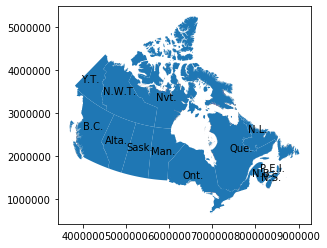

In [49]:
#create map labels 
map_df['labels'] = map_df['geometry'].apply(lambda x: x.representative_point().coords[:])
map_df['labels'] = [labels[0] for labels in map_df['labels']]

map_df.plot()
for idx, row in map_df.iterrows():
    plt.annotate(s=row['PREABBR'], xy=row['labels'],
                 horizontalalignment='center')

In [ ]:
map_df.plot()

In [50]:
rows_list = []
import random 

for index, rows in map_df.iterrows(): 
    name = rows['PRENAME']
    rows_list.append({'PRENAME' : name, 'DEATHS': random.randint(1,101)})

test_df = pd.DataFrame(rows_list, columns = ['PRENAME','DEATHS'])

In [51]:
test_df

,PRENAME,DEATHS
0,Newfoundland and Labrador,89
1,Prince Edward Island,63
2,Nova Scotia,58
3,New Brunswick,65
4,Quebec,88
5,Ontario,52
6,Manitoba,70
7,Saskatchewan,32
8,Alberta,64
9,British Columbia,52


In [52]:
#merge the two dataframes
merged = map_df.set_index('PRENAME').join(test_df.set_index('PRENAME'))
merged

,PRUID,PRNAME,PRFNAME,PREABBR,PRFABBR,geometry,labels,DEATHS
PRENAME,,,,,,,,
Newfoundland and Labrador,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"(POLYGON ((8307365.58857 2582136.71143, 830839...","(8058302.280821666, 2543821.4057125)",89
Prince Edward Island,11,Prince Edward Island / Île-du-Prince-Édouard,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"(POLYGON ((8435711.754285 1679935.965715, 8435...","(8393622.150738476, 1639505.1257125)",63
Nova Scotia,12,Nova Scotia / Nouvelle-Écosse,Nouvelle-Écosse,N.S.,N.-É.,"(POLYGON ((8470851.645715 1624745.01143, 84710...","(8352438.155918451, 1436604.6357149999)",58
New Brunswick,13,New Brunswick / Nouveau-Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"(POLYGON ((8176224.537145 1722553.46, 8176230....","(8154756.382154569, 1545437.86857)",65
Quebec,24,Quebec / Québec,Québec,Que.,Qc,"(POLYGON ((8399709.494284999 2261445.702855, 8...","(7662900.652879961, 2106214.4414275)",88
Ontario,35,Ontario,Ontario,Ont.,Ont.,"(POLYGON ((6378815.614285 2295412.44, 6378746....","(6562884.375504933, 1491674.3242875)",52
Manitoba,46,Manitoba,Manitoba,Man.,Man.,"(POLYGON ((6039656.508570001 2636304.342855, 6...","(5867655.264833283, 2054481.07857)",70
Saskatchewan,47,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((5248633.914285 2767057.262855, 52492...","(5305875.969116837, 2126363.1514275)",32
Alberta,48,Alberta,Alberta,Alta.,Alb.,"POLYGON ((5228304.177145001 2767597.89143, 522...","(4769959.20234591, 2291195.914285)",64


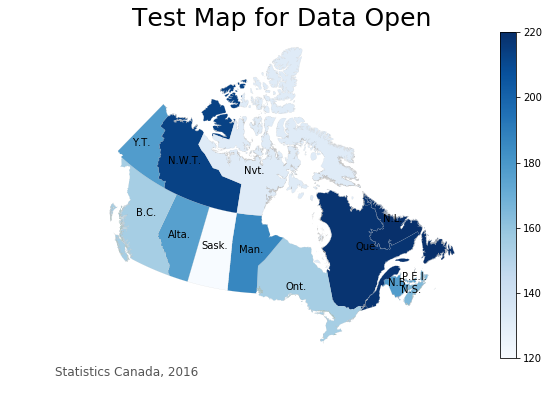

In [54]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'DEATHS'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')


# add a title
ax.set_title('Test Map for Data Open', fontdict={"fontsize": '25', 'fontweight' : '3'})
# create an annotation for the data source
ax.annotate('Statistics Canada, 2016',xy=(0.1, .08),
            xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

#creates the labels for the map
for idx, row in merged.iterrows():
    ax.annotate(s=row['PREABBR'], xy=row['labels'],
                 horizontalalignment='center')
    

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm)


merged.plot(column=variable, cmap='Blues', linewidth=0.1, ax=ax, edgecolor='0.75')

(3423124.13043, 9282051.51243, 430196.84214275004, 5471321.2350022495)